![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/04_Hyperparameter%20Tuning%20with%20Cross%20Validation/04_cross-validation_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Load the Data

- We take some dataset from the _[Machine Learning Data Repository UCI](https://archive.ics.uci.edu/ml/datasets/adult)_
- The aim is to predict weather a **person** (rows) `earned>50k` a year or not
- Based on their **social-demographic features** (columns)

PD: You may see the column names & meanings [here ↗](https://archive.ics.uci.edu/ml/datasets/adult).

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_salary = pd.read_csv(url, header=None, na_values=' ?')
df_salary.rename(columns={14: 'target'}, inplace=True)
df_salary.columns = [str(i) for i in df_salary.columns]
df_salary.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Preprocess the Data

Need to check if there are columns with null values, solve the null value issue then ,create a dummy for the categorical columns

In [2]:
df_salary.isna().sum()

0            0
1         1836
2            0
3            0
4            0
5            0
6         1843
7            0
8            0
9            0
10           0
11           0
12           0
13         583
target       0
dtype: int64

In [3]:
#Drop the null rows 
df_salary.dropna(inplace=True)

Get the dummies for the categorical columns.

In [4]:
import pandas as pd
df_salary=pd.get_dummies(df_salary,drop_first=True)

In [5]:
df_salary

,0,2,4,10,11,12,1_ Local-gov,1_ Private,1_ Self-emp-inc,1_ Self-emp-not-inc,1_ State-gov,1_ Without-pay,3_ 11th,3_ 12th,3_ 1st-4th,3_ 5th-6th,3_ 7th-8th,3_ 9th,3_ Assoc-acdm,3_ Assoc-voc,3_ Bachelors,3_ Doctorate,3_ HS-grad,3_ Masters,3_ Preschool,3_ Prof-school,3_ Some-college,5_ Married-AF-spouse,5_ Married-civ-spouse,5_ Married-spouse-absent,5_ Never-married,5_ Separated,5_ Widowed,6_ Armed-Forces,6_ Craft-repair,6_ Exec-managerial,6_ Farming-fishing,6_ Handlers-cleaners,6_ Machine-op-inspct,6_ Other-service,6_ Priv-house-serv,6_ Prof-specialty,6_ Protective-serv,6_ Sales,6_ Tech-support,6_ Transport-moving,7_ Not-in-family,7_ Other-relative,7_ Own-child,7_ Unmarried,7_ Wife,8_ Asian-Pac-Islander,8_ Black,8_ Other,8_ White,9_ Male,13_ Canada,13_ China,13_ Columbia,13_ Cuba,13_ Dominican-Republic,13_ Ecuador,13_ El-Salvador,13_ England,13_ France,13_ Germany,13_ Greece,13_ Guatemala,13_ Haiti,13_ Holand-Netherlands,13_ Honduras,13_ Hong,13_ Hungary,13_ India,13_ Iran,13_ Ireland,13_ Italy,13_ Jamaica,13_ Japan,13_ Laos,13_ Mexico,13_ Nicaragua,13_ Outlying-US(Guam-USVI-etc),13_ Peru,13_ Philippines,13_ Poland,13_ Portugal,13_ Puerto-Rico,13_ Scotland,13_ South,13_ Taiwan,13_ Thailand,13_ Trinadad&Tobago,13_ United-States,13_ Vietnam,13_ Yugoslavia,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [6]:
#Select the features and target 
features = df_salary.iloc[:,:-1]
target = df_salary.iloc[:,-1]


## `train_test_split()` the Data

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     features, target, test_size=0.33, random_state=42)

## `DecisionTreeClassifier()` with Default Hyperparameters

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model_dt = DecisionTreeClassifier()

In [12]:
model_dt.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

### Accuracy

#### > In `train` data

In [13]:
model_dt.score(X=X_train,y=y_train)

1.0

#### > In `test` data

In [14]:
model_dt.score(X=X_test,y=y_test)

0.8107293550331525

### Model Visualization

In [15]:
from sklearn.tree import plot_tree

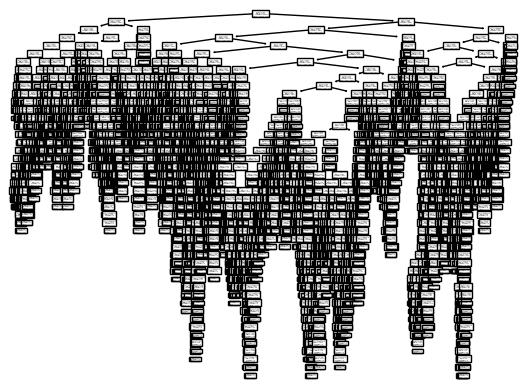

In [19]:
plot_tree(decision_tree=model_dt);

## Interpretation

- [ ] Why the difference on accuracy is so much?

## `DecisionTreeClassifier()` with Custom Hyperparameters

In [47]:
model_dt1 = DecisionTreeClassifier(criterion='gini',max_depth=3,splitter='random',min_samples_split=10)
model_dt1.fit(X=X_train,y=y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10, splitter='random')

### 1st Configuration

#### Accuracy

##### > In `train` data

In [48]:
model_dt1.score(X=X_train,y=y_train)

0.8140835312747426

##### > In `test` data

In [49]:
model_dt1.score(X=X_test,y=y_test)

0.8078159533855737

#### Model Visualization

In [50]:
from sklearn.tree import plot_tree

In [52]:
features.columns

Index(['0', '2', '4', '10', '11', '12', '1_ Local-gov', '1_ Private',
       '1_ Self-emp-inc', '1_ Self-emp-not-inc', '1_ State-gov',
       '1_ Without-pay', '3_ 11th', '3_ 12th', '3_ 1st-4th', '3_ 5th-6th',
       '3_ 7th-8th', '3_ 9th', '3_ Assoc-acdm', '3_ Assoc-voc', '3_ Bachelors',
       '3_ Doctorate', '3_ HS-grad', '3_ Masters', '3_ Preschool',
       '3_ Prof-school', '3_ Some-college', '5_ Married-AF-spouse',
       '5_ Married-civ-spouse', '5_ Married-spouse-absent', '5_ Never-married',
       '5_ Separated', '5_ Widowed', '6_ Armed-Forces', '6_ Craft-repair',
       '6_ Exec-managerial', '6_ Farming-fishing', '6_ Handlers-cleaners',
       '6_ Machine-op-inspct', '6_ Other-service', '6_ Priv-house-serv',
       '6_ Prof-specialty', '6_ Protective-serv', '6_ Sales',
       '6_ Tech-support', '6_ Transport-moving', '7_ Not-in-family',
       '7_ Other-relative', '7_ Own-child', '7_ Unmarried', '7_ Wife',
       '8_ Asian-Pac-Islander', '8_ Black', '8_ Other', '8_ White', '9

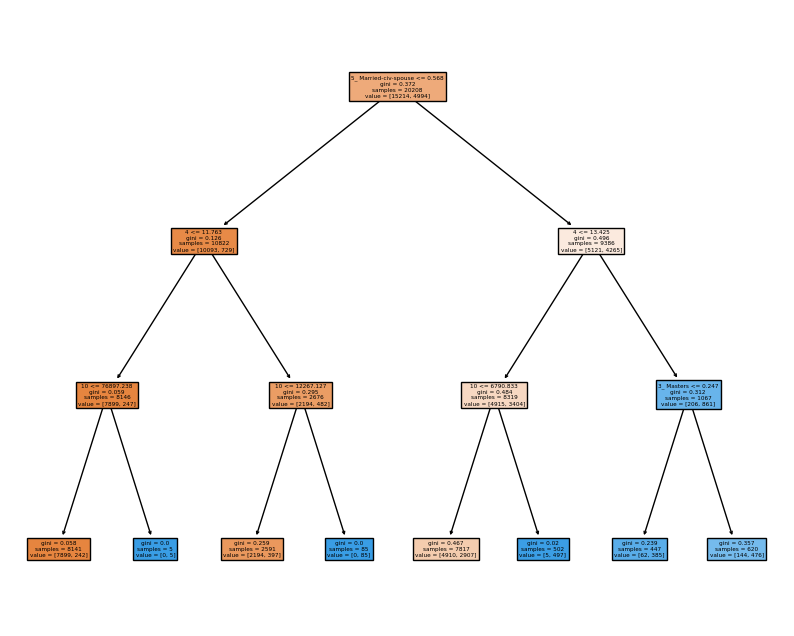

In [57]:
import matplotlib.pyplot as plot
plot.figure(figsize=(10,8))

plot_tree(decision_tree=model_dt1,feature_names=features.columns,filled=True);

### 2nd Configuration

In [67]:
model_dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',min_weight_fraction_leaf=0.0,ccp_alpha=0.0)
model_dt2.fit(X=X_train,y=y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

## train score

In [68]:
model_dt2.score(X=X_train,y=y_train)

0.8630740300870943

## test score

In [69]:
model_dt2.score(X=X_test,y=y_test)

0.8473980309423348

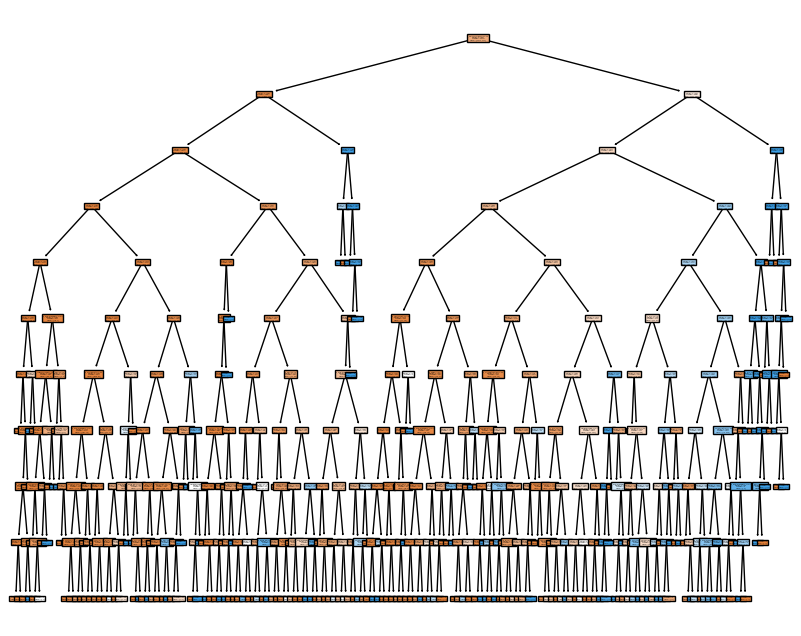

In [70]:
from sklearn.tree import plot_tree
plot.figure(figsize=(10,8))

plot_tree(decision_tree=model_dt2,feature_names=features.columns,filled=True);


### 3rd Configuration

In [71]:
model_dt3 = DecisionTreeClassifier(criterion='log_loss',max_depth=7,splitter='random')
model_dt3.fit(X=X_train,y=y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=7, splitter='random')

## train score

In [73]:
model_dt3.score(X=X_train,y=y_train)

0.8292260490894695

## test score

In [72]:
model_dt3.score(X=X_test,y=y_test)

0.8243922041390396

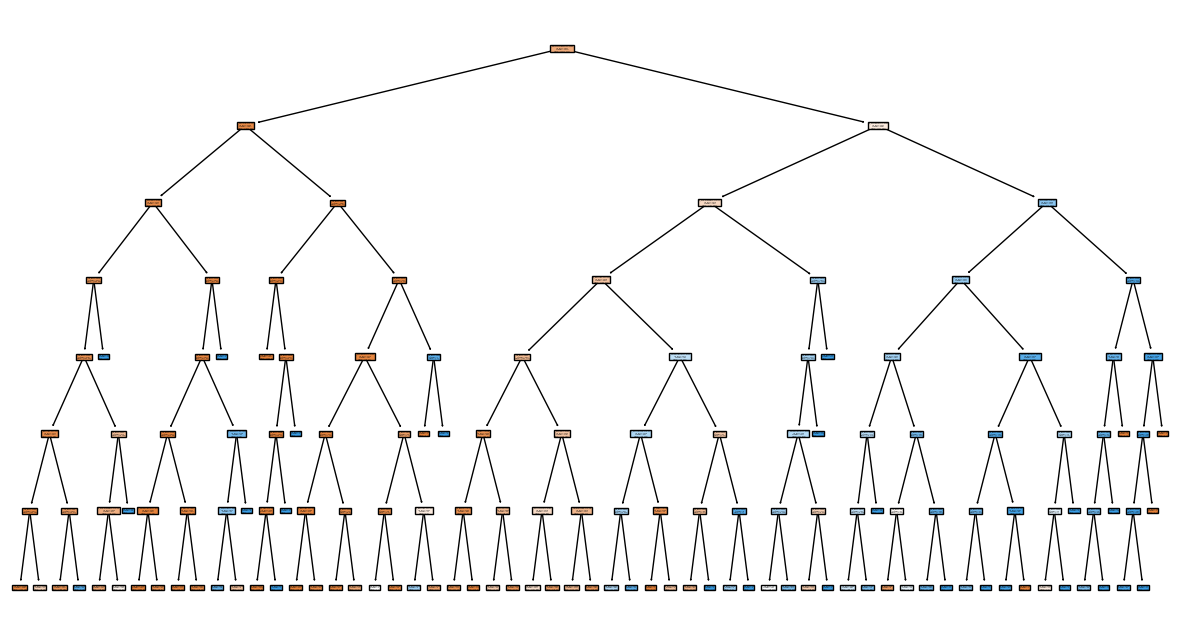

In [76]:
from sklearn.tree import plot_tree
plot.figure(figsize=(15,8))

plot_tree(decision_tree=model_dt3,feature_names=features.columns,filled=True);

### 4th Configuration

In [79]:
model_dt4 = DecisionTreeClassifier(criterion='entropy',splitter='random',max_features=0.03)
model_dt4.fit(X=X_train,y=y_train)

DecisionTreeClassifier(criterion='entropy', max_features=0.03,
                       splitter='random')

## train score

In [80]:
model_dt4.score(X=X_train,y=y_train)

1.0

## test score

In [81]:
model_dt4.score(X=X_test,y=y_test)

0.7835041189471569

## plot tree

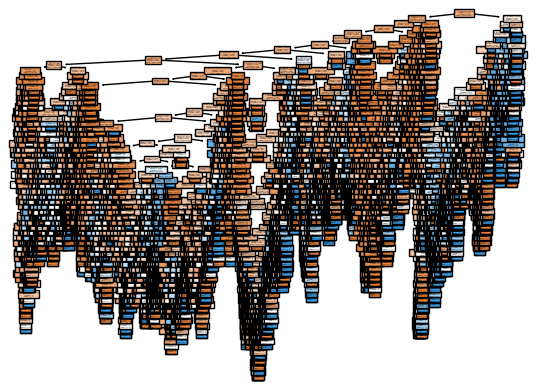

In [82]:
from sklearn.tree import plot_tree


plot_tree(decision_tree=model_dt4,feature_names=features.columns,filled=True);

### 5th Configuration

In [ ]:
model_dt5 = DecisionTreeClassifier(splitter='random',max_features=0.03,max_depth = 5)
model_dt5.fit(X=X_train,y=y_train

## `GridSearchCV()` to find Best Hyperparameters

In [83]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {'max_depth':[None,5,10,25,25,50,75],
             'splitter':['random','best'],
             'criterion':['entropy','gini'],
             'max_features':[0.03,0.21,0.33]}

In [93]:
gs_dt = GridSearchCV(estimator = model_dt,param_grid=param_grid)

In [95]:
gs_dt.fit(X=X_train,y=y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 5, 10, 25, 25, 50, 75],
                         'max_features': [0.03, 0.21, 0.33],
                         'splitter': ['random', 'best']})

In [98]:
gs_dt.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=0.33)

In [99]:
gs_dt.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.33,
 'splitter': 'best'}

## Other Models

### Support Vector Machines `SVC()`

https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [71]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X=X_train)



MinMaxScaler()

In [167]:
X_trained_scaled = pd.DataFrame(scaler.transform(X_train),columns=features.columns)

In [168]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=features.columns)

In [169]:
from sklearn.model_selection import GridSearchCV

In [170]:
from sklearn.svm import SVC

In [171]:
model_sv = SVC()

In [172]:
model_sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [173]:

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

cv_sv = GridSearchCV(estimator=model_sv, param_grid=param_grid, verbose=2)
cv_sv.fit(X_trained_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time=  10.7s
[CV] END ...............................C=0.1, kernel=linear; total time=  10.5s
[CV] END ...............................C=0.1, kernel=linear; total time=  10.5s
[CV] END ...............................C=0.1, kernel=linear; total time=  11.0s
[CV] END ...............................C=0.1, kernel=linear; total time=  11.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=  16.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=  16.3s
[CV] END ..................................C=0.1, kernel=rbf; total time=  15.8s
[CV] END ..................................C=0.1, kernel=rbf; total time=  22.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=  22.5s
[CV] END .................................C=1, kernel=linear; total time=  10.9s
[CV] END .................................C=1, ke

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [174]:
cv_sv.best_params_

{'C': 10, 'kernel': 'linear'}

### K Nearest Neighbors `KNeighborsClassifier()`

In [85]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [175]:
from sklearn.neighbors import KNeighborsClassifier
model_kn=KNeighborsClassifier()

In [176]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [177]:
param_grid = {'algorithm':['brute','auto'],
             'weights':['uniform','metric_params','n_jobs'],
             'leaf_size':[30,45,65]}

In [178]:
kn_cv=GridSearchCV(estimator = model_kn,param_grid=param_grid)

In [179]:
kn_cv.fit(X_trained_scaled,y_train)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 205, in fit
    self.weights = _check_weights(self.weights)
  File "/Applications/miniconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 89, in _check_weights
    rais

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['brute', 'auto'],
                         'leaf_size': [30, 45, 65],
                         'weights': ['uniform', 'metric_params', 'n_jobs']})

In [160]:
kn_cv.best_params_

{'algorithm': 'brute', 'leaf_size': 30, 'weights': 'uniform'}

# Best Model with Best Hyperparameters

In [161]:
result = {'model':
          [kn_cv.best_estimator_,
         cv_sv.best_estimator_,
         gs_dt.best_estimator_],
         'hyperparameters':
        [ kn_cv.best_params_,
         cv_sv.best_params_,
         gs_dt.best_params_],
         'score':
         [kn_cv.score(X_scaled_test,y_test),
         cv_sv.score(X_scaled_test,y_test),
         gs_dt.score(X_test,y_test)]
                      }

In [162]:
df_cv_comp = pd.DataFrame(result)
df_cv_comp.style.background_gradient()

,model,hyperparameters,score
0,KNeighborsClassifier(algorithm='brute'),"{'algorithm': 'brute', 'leaf_size': 30, 'weights': 'uniform'}",0.824493
1,"SVC(C=10, kernel='linear')","{'C': 10, 'kernel': 'linear'}",0.849206
2,"DecisionTreeClassifier(max_depth=10, max_features=0.33)","{'criterion': 'gini', 'max_depth': 10, 'max_features': 0.33, 'splitter': 'best'}",0.850111


# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [x] Even a model can be bettered
- [x] The goal is to make models that perform a better accuracy on data not seen
    - The banks would like to know if a **future client** will be able to pay the loan
    - Not a past client
    - Unfortunately, we do not have data for future clients
    - So, we fix this with `Data Splitting` into
        - Train
            - Fold Validation
        - Test
- [x] Understand the Machine Learning Applications to businesses
    - To predict if a customer will pay the loan
    - To predict if an athlete will have an injury